## Q4

### Part A

About dataset:
dtype:  float64   shape:  (1797, 8, 8)   size:  115008


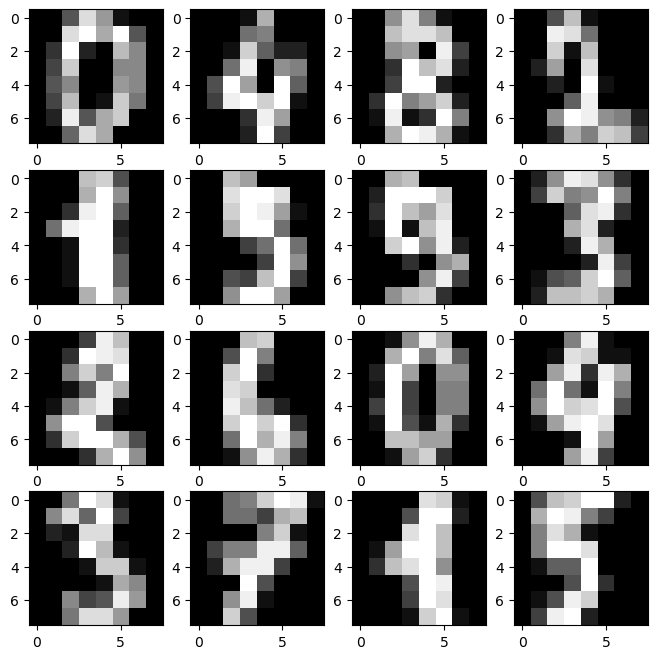

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random

#Load the dataset; then, shuffle it
numbers = load_digits()
print("About dataset:")
print ("dtype: ",numbers.images.dtype,"  shape: ", numbers.images.shape,"  size: ", numbers.images.size)
#show in one 4*4 plot
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
x_dim,y_dim = numbers.data,numbers.target
permutation = np.random.permutation(len(x_dim))
x, y = x_dim[permutation], y_dim[permutation]
for i in range(16):
    id = random.randint(0, len(numbers.images) - 1)
    ax[i % 4, int(i / 4)].imshow(numbers.images[i],cmap='gray')
    ##gray-scale display : cmap='gray'
similarity1 = np.zeros_like(numbers)
similarity2 = np.ones_like(numbers)

### Part B

In [86]:
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
import warnings
# warnings.filterwarnings('ignore')

def Cosine_distance_metrices(f_point: np.ndarray, s_point: np.ndarray):
    return 1 - (np.dot(f_point, s_point) / (norm(f_point, ord = 2) * norm(s_point, ord = 2)))

def Euclidean_distance_metrices(f_point: np.ndarray, s_point: np.ndarray):
    return np.sum(np.sqrt(np.power(f_point - s_point, 2)))

def KNN(k_param, Xdim_for_train, ydim_for_train, atached_array, distance_metrices):
    d_array,dim_array,election_array = [],[],[]
    param, _ = Xdim_for_train.shape
    for i in range(param):
        d_value = distance_metrices(Xdim_for_train[i], atached_array)
        dim_array.append(d_value)
        d_array.append((d_value, i))
    d_array.sort(key=lambda x: x[0])
    solutions = d_array[0:k_param]
    for i in range(len(solutions)):
        _ , u_num = solutions[i]
        election_array.append(ydim_for_train[u_num])
    return mode(election_array, keepdims=True).mode,solutions


### Part C

In [29]:

from scipy.stats import mode
from sklearn.metrics import accuracy_score
#Split dataset into train and test sets with ratio of 8:2
Xdim_for_train, Xdim_for_test, ydim_for_train, ydim_for_test = train_test_split(x_dim , y_dim , test_size=0.2, random_state=56)

#A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters
#into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Cosine_distance,index_plot,one_dif_accuracy = [],[],[]
for k in range(1, 26):
    p_array = []
    print(f"Iteration number {k}/26 is running")
    for i in range(len(Xdim_for_test)):
        predict, const = KNN(k_param=k, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Cosine_distance_metrices,atached_array=Xdim_for_test[i])
        p_array.append(predict)
    accuracy_score_value = accuracy_score(p_array, ydim_for_test)
    Cosine_distance.append(accuracy_score_value)
    index_plot.append(k)

best = np.argmax(np.array(Cosine_distance)) + 1
print("best k for all iterations is:" ,best,"accuracy: ",Cosine_distance[best])

Iteration number 1/26 is running
Iteration number 2/26 is running
Iteration number 3/26 is running
Iteration number 4/26 is running
Iteration number 5/26 is running
Iteration number 6/26 is running
Iteration number 7/26 is running
Iteration number 8/26 is running
Iteration number 9/26 is running
Iteration number 10/26 is running
Iteration number 11/26 is running
Iteration number 12/26 is running
Iteration number 13/26 is running
Iteration number 14/26 is running
Iteration number 15/26 is running
Iteration number 16/26 is running
Iteration number 17/26 is running
Iteration number 18/26 is running
Iteration number 19/26 is running
Iteration number 20/26 is running
Iteration number 21/26 is running
Iteration number 22/26 is running
Iteration number 23/26 is running
Iteration number 24/26 is running
Iteration number 25/26 is running
best k for all iterations is: 5 accuracy:  0.9944444444444445


### Elbow for Cosine_distance_metric

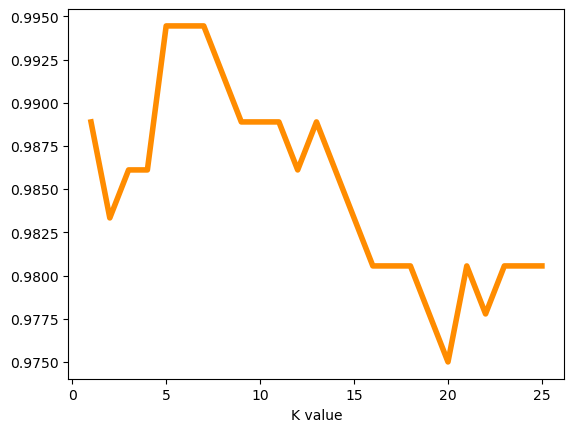

In [32]:
plt.xlabel("K value")
plt.plot(index_plot, Cosine_distance, color="darkorange", linewidth=4)

In [33]:
Euclidean_distance,index_plot,one_dif_accuracy = [],[],[]
for k in range(1, 27):
    p_array = []
    print(f"Iteration number {k}/26 is running")
    for i in range(len(Xdim_for_test)):
        predict, const = KNN(k_param=k, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Euclidean_distance_metrices,atached_array=Xdim_for_test[i])
        p_array.append(predict)
    accuracy_score_value = accuracy_score(p_array, ydim_for_test)
    Euclidean_distance.append(accuracy_score_value)
    index_plot.append(k)
#     one_dif_accuracy.append(1-accuracy_score_value)
    
best = np.argmax(np.array(Euclidean_distance)) + 1
print("best k for all iterations is:" ,best,"accuracy: ",Euclidean_distance[best])

Iteration number 1/26 is running
Iteration number 2/26 is running
Iteration number 3/26 is running
Iteration number 4/26 is running
Iteration number 5/26 is running
Iteration number 6/26 is running
Iteration number 7/26 is running
Iteration number 8/26 is running
Iteration number 9/26 is running
Iteration number 10/26 is running
Iteration number 11/26 is running
Iteration number 12/26 is running
Iteration number 13/26 is running
Iteration number 14/26 is running
Iteration number 15/26 is running
Iteration number 16/26 is running
Iteration number 17/26 is running
Iteration number 18/26 is running
Iteration number 19/26 is running
Iteration number 20/26 is running
Iteration number 21/26 is running
Iteration number 22/26 is running
Iteration number 23/26 is running
Iteration number 24/26 is running
Iteration number 25/26 is running
Iteration number 26/26 is running
best k for all iterations is: 5 accuracy:  0.9888888888888889


### Elbow for Euclidean_distance_metric

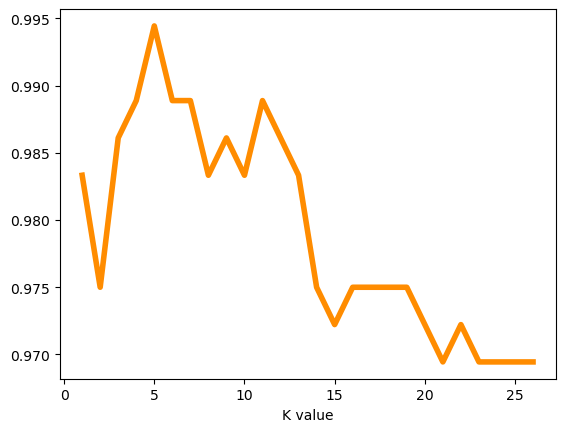

In [34]:
plt.xlabel("K value")
plt.plot(index_plot, Euclidean_distance, color="darkorange", linewidth=4)

### Error estimation for Euclidean_distance_metric

### Part D

In [88]:

result_Euclidean_distance_metrices,result_Cosine_distance_metrices = [],[]
for i in range(len(Xdim_for_test)):
    predict1, _ = KNN(k_param=10, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Euclidean_distance_metrices,atached_array=Xdim_for_test[i])
    predict2, _ = KNN(k_param=10, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Cosine_distance_metrices,atached_array=Xdim_for_test[i])
    result_Euclidean_distance_metrices.append(predict1)
    result_Cosine_distance_metrices.append(predict2)

print("Euclidean_distance_metrices: ",accuracy_score(result_Euclidean_distance_metrices, ydim_for_test))
print("Cosine_distance_metrices: ",accuracy_score(result_Cosine_distance_metrices, ydim_for_test))



Euclidean_distance_metrices:  0.9833333333333333
Cosine_distance_metrices:  0.9888888888888889


### Part E

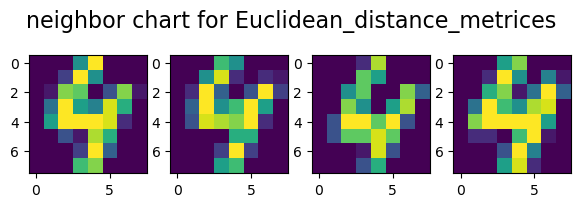

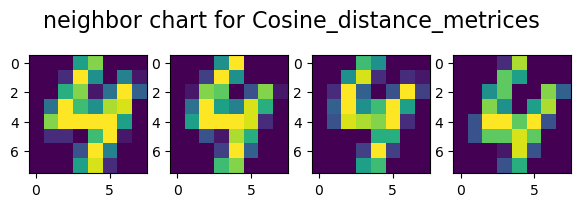

In [41]:
randomly_generated_number = random.randint(1,  len(Xdim_for_test))
_, d = KNN(k_param=5, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Euclidean_distance_metrices,
                                 atached_array=Xdim_for_test[randomly_generated_number])
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7, 6))
fig.suptitle('neighbor chart for Euclidean_distance_metrices', fontsize=16)
fig.subplots_adjust(top=1.5)
for i in range(4):
    the_image_data = Xdim_for_train[d[i][1], :]
    the_image = np.reshape(the_image_data, (8, 8))
    ax[i].imshow(the_image)

_,d = KNN(k_param=5, Xdim_for_train=Xdim_for_train, ydim_for_train=ydim_for_train, distance_metrices=Cosine_distance_metrices,
                                 atached_array=Xdim_for_test[randomly_generated_number])

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7, 6))
fig.suptitle('neighbor chart for Cosine_distance_metrices', fontsize=16)
fig.subplots_adjust(top=1.5)
for i in range(4):
    the_image_data = Xdim_for_train[d[i][1], :]
    the_image = np.reshape(the_image_data, (8, 8))
    ax[i].imshow(the_image)

### Part F

In [69]:
def dataset_handler(cost_function, k = 5):
    result_array = []
    for x in Xdim_for_test:
        pred, distances = KNN(k_param = k, Xdim_for_train = Xdim_for_train, ydim_for_train = ydim_for_train, 
                       distance_metrices = cost_function,atached_array = x)
        result_array.append(pred[0])
    return result_array

handler_result = np.array(dataset_handler(Cosine_distance_metrices))
first__y = pd.Series(ydim_for_test , name='Orginal')
second__y = pd.Series(handler_result, name='Predict: ')
Cosine__confusion = pd.crosstab(first__y, second__y)
print("\t   Cosine_distance_metric:")
print(Cosine__confusion)
print("__________________________________________________________________")
print("__________________________________________________________________")
handler_result = np.array(dataset_handler(Euclidean_distance_metrices))
first__y = pd.Series(ydim_for_test , name='Orginal')
second__y = pd.Series(handler_result, name='Predict: ')
Euclidean__confusion = pd.crosstab(first__y, second__y)
print("\t   Euclidean_distance_metric")
print(Euclidean__confusion)

	   Cosine_distance_metric:
Predict:    0   1   2   3   4   5   6   7   8   9
Orginal                                          
0          34   0   0   0   0   0   0   0   0   0
1           0  39   0   0   0   0   0   0   0   0
2           0   0  36   0   0   0   0   0   0   0
3           0   0   0  35   0   0   0   0   0   0
4           0   0   0   0  31   0   0   0   0   0
5           0   0   0   0   0  38   0   0   0   1
6           0   0   0   0   0   0  42   0   0   0
7           0   0   0   0   0   0   0  37   0   0
8           0   0   0   0   0   0   0   0  32   0
9           0   0   0   0   0   1   0   0   0  34
__________________________________________________________________
__________________________________________________________________
	   Euclidean_distance_metric
Predict:    0   1   2   3   4   5   6   7   8   9
Orginal                                          
0          34   0   0   0   0   0   0   0   0   0
1           0  39   0   0   0   0   0   0   0   0
2       

### Part G&H

In [84]:
TP = Truely_predicted_as_postive(Euclidean__confusion,8)
FP = Falsly_predicted_as_Postive(Euclidean__confusion,8)
FN = Falsly_predicted_as_Negative(Euclidean__confusion,8)
F1 = TP/(TP + 0.5 * (FP+FN))
print(f'Details about 8: TP:{TP} , FP:{FP}, FN:{FN} , F1:{F1}')

#____________________________________________________________________________

TP = Truely_predicted_as_postive(Euclidean__confusion,3)
FP = Falsly_predicted_as_Postive(Euclidean__confusion,3)
FN = Falsly_predicted_as_Negative(Euclidean__confusion,3)
F1 = TP/(TP + 0.5 * (FP+FN))
print(f'Details about 3: TP:{TP} , FP:{FP}, FN:{FN} , F1:{F1}')

#____________________________________________________________________________



Details about 8: TP:32 , FP:32, FN:32 , F1:0.5
Details about 3: TP:35 , FP:35, FN:35 , F1:0.5
